Importar das Bibliotecas

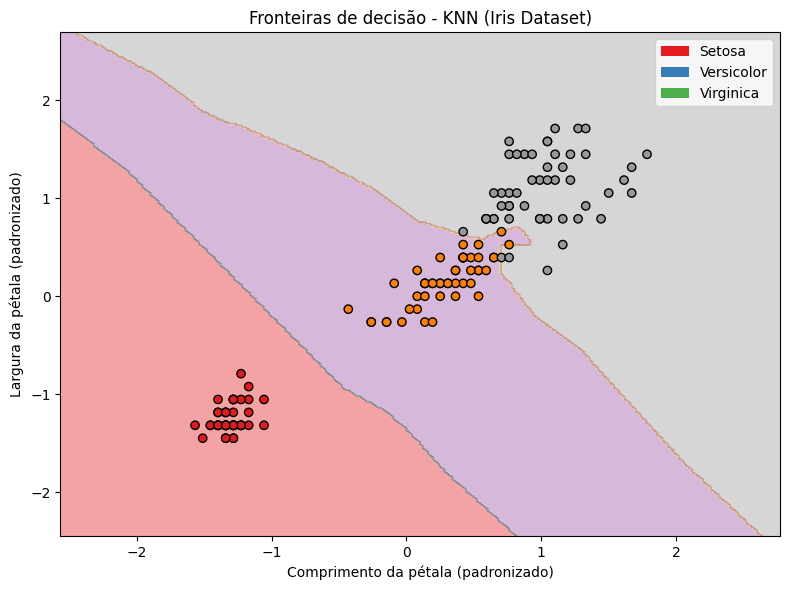

In [10]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  # Para criar a legenda com cores
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Fase 1: Carregamento dos dados
# --------------------------------------------
# Carregamos o famoso dataset Iris, que contém medições de flores de 3 espécies:
# Setosa, Versicolor e Virginica. Cada flor tem 4 atributos:
# - comprimento e largura das sépalas
# - comprimento e largura das pétalas
iris = load_iris()

# Selecionamos apenas as duas últimas colunas (índices 2 e 3):
# comprimento e largura da pétala, que são bons separadores visuais
X = iris.data[:, 2:4]
y = iris.target  # Vetor com os rótulos das classes (0, 1 ou 2)

# Fase 2: Pré-processamento (padronização)
# --------------------------------------------
# O KNN é sensível à escala dos dados, então usamos StandardScaler
# para padronizar: média = 0, desvio padrão = 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fase 3: Separação dos dados em treino e teste
# --------------------------------------------
# Dividimos os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fase 4: Criação e treinamento do modelo KNN
# --------------------------------------------
# Criamos o classificador KNN com k=3 (considera os 3 vizinhos mais próximos)
modelo = KNeighborsClassifier(n_neighbors=3)

# Treinamos o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fase 5: Geração da malha para visualização das fronteiras
# --------------------------------------------
# Criamos uma grade de pontos que cobre todo o espaço das features,
# para prever a classe de cada ponto e desenhar as regiões de decisão
h = .02  # passo da grade (resolução)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Criamos a malha com np.meshgrid
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Para cada ponto na malha, fazemos a predição com o modelo treinado
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])  # .ravel() transforma em vetor
Z = Z.reshape(xx.shape)  # Reorganizamos para o formato da grade

# Fase 6: Plotagem das fronteiras de decisão
# --------------------------------------------
plt.figure(figsize=(8, 6))  # Tamanho do gráfico

# Desenhamos as regiões de decisão usando as predições Z
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)

# Plota os dados reais (X[:, 0] = comprimento da pétala, X[:, 1] = largura)
# As cores são baseadas nos rótulos verdadeiros (c=y)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)

# Eixos com nomes explicativos
plt.xlabel('Comprimento da pétala (padronizado)')
plt.ylabel('Largura da pétala (padronizado)')

# Título do gráfico
plt.title('Fronteiras de decisão - KNN (Iris Dataset)')

# Fase 7: Legenda
# --------------------------------------------
# Criamos manualmente uma legenda com cores que correspondem às classes
legend_elements = [
    Patch(facecolor=plt.cm.Set1(0), label='Setosa'),      # Classe 0
    Patch(facecolor=plt.cm.Set1(1), label='Versicolor'),  # Classe 1
    Patch(facecolor=plt.cm.Set1(2), label='Virginica')    # Classe 2
]
plt.legend(handles=legend_elements, loc='upper right')  # Posição da legenda

# Ajusta o layout para não cortar nada
plt.tight_layout()

# Fase 8: Exibição do gráfico
# --------------------------------------------
plt.show()
